# [1D] Simple systems

In [1]:
import brainpy as bp

bp.math.enable_x64()
bp.math.set_platform('cpu')

## Phase plane

Here we will show the birfurcation analysis of 1D system with dummy test neuronal model.

$$\dot{x} = x^3-x + I$$

First, let's define the model.

In [2]:
@bp.odeint
def int_x(x, t, Iext):
  dx = x ** 3 - x + Iext
  return dx

I am creating vector fields ...
I am searching fixed points ...
Fixed point #1 at x=-1.0000000000000002 is a unstable point.
Fixed point #2 at x=-7.771561172376096e-16 is a stable point.
Fixed point #3 at x=1.0000000000000002 is a unstable point.


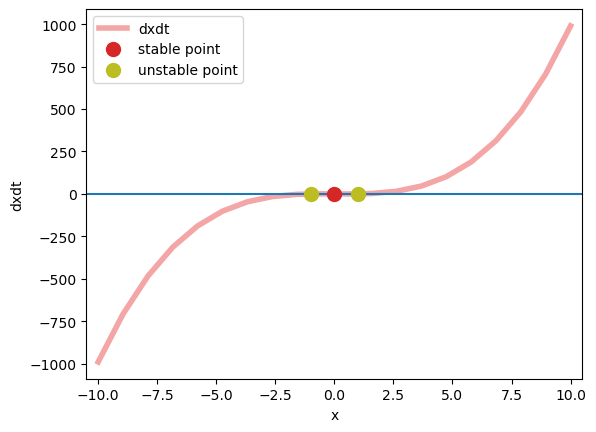

In [3]:
analyzer = bp.analysis.PhasePlane1D(int_x,
                                    target_vars={'x': [-10, 10]},
                                    pars_update={'Iext': 0.})
analyzer.plot_vector_field()
analyzer.plot_fixed_point(show=True)

## Codimension1

Then, create a bifurcation analyzer with ``bp.symbolic.Bifurcation``.

I am making bifurcation analysis ...


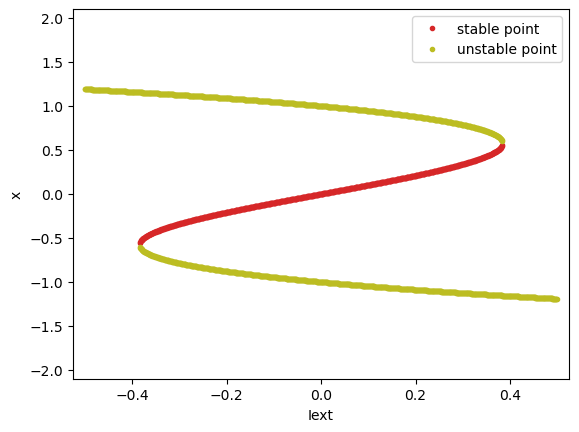

In [4]:
an = bp.analysis.Bifurcation1D(
  int_x,
  target_pars={'Iext': [-0.5, 0.5]},
  target_vars={"x": [-2, 2]},
  resolutions=0.001
)
an.plot_bifurcation(show=True)

## Codimension2

Here we define the following 1D model for codimension 2 bifurcation testing.

$$\dot{x} = \mu+ \lambda x - x^3$$

In [5]:
@bp.odeint
def int_x(x, t, mu, lambda_):
  dxdt = mu + lambda_ * x - x ** 3
  return dxdt

I am making bifurcation analysis ...


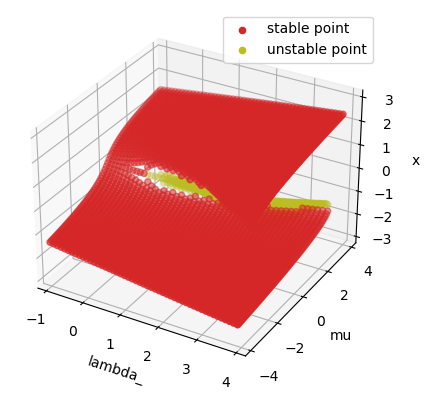

In [8]:
analyzer = bp.analysis.Bifurcation1D(
  int_x,
  target_pars={'lambda_': [-1, 4], 'mu': [-4, 4], },
  target_vars={'x': [-3, 3]},
  resolutions=0.1
)
analyzer.plot_bifurcation(show=True)